In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

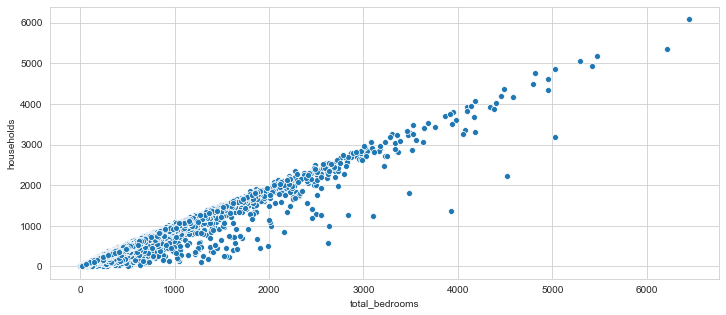

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.scatterplot(df['total_bedrooms'],df['households'])

In [7]:

def fillna_households(col):
    total_bedrooms=col[0]
    households=col[1]
    if pd.isnull(total_bedrooms):
        return households
    else:
        return total_bedrooms
    

df['total_bedrooms'] = df[['total_bedrooms','households']].apply(fillna_households,axis=1)

In [8]:
coordinates = pd.DataFrame(df[['longitude','latitude']])

In [9]:
from sklearn.cluster import KMeans
SSE_scaled=[]
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(coordinates)
    SSE_scaled.append(kmeans.inertia_)


C:\Users\sudar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\sudar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\sudar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\sudar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\sudar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

Text(0, 0.5, 'SSE')

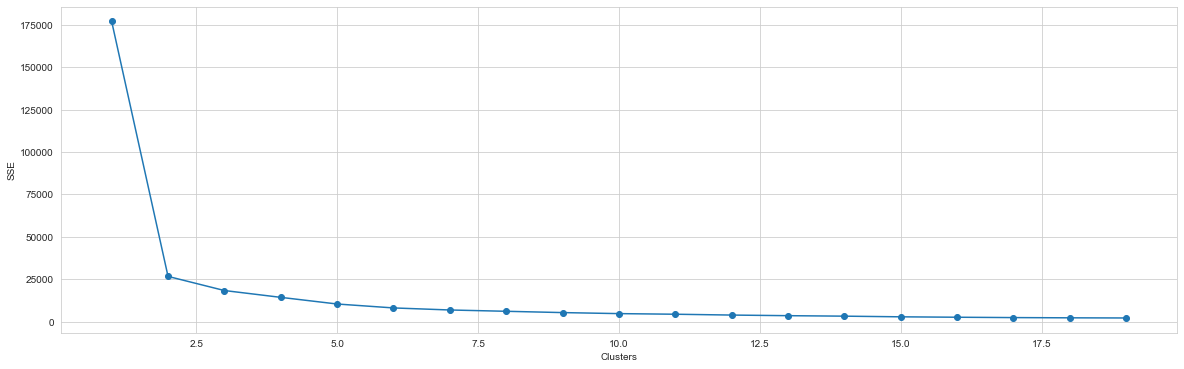

In [10]:
plt.figure(figsize=(20,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

In [11]:
kmeans = KMeans(n_jobs = -1, n_clusters = 2)
kmeans.fit(coordinates)
pred_zones = kmeans.predict(coordinates)

C:\Users\sudar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [12]:
new_df = pd.DataFrame(df)

In [13]:
new_df['Zones'] = pred_zones 

In [14]:
new_df.drop(['longitude','latitude'],inplace=True,axis=1)
new_df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Zones
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1


In [15]:
new_df['Zones'].value_counts()

0    11947
1     8693
Name: Zones, dtype: int64

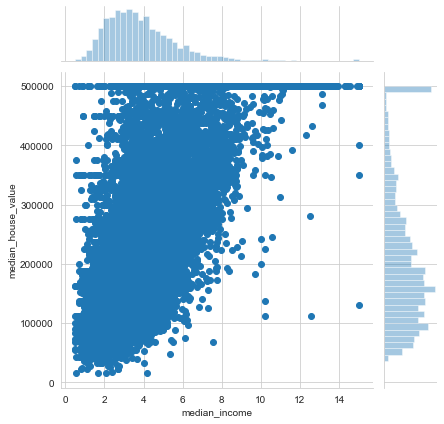

In [16]:
sns.jointplot(df['median_income'],df['median_house_value'])

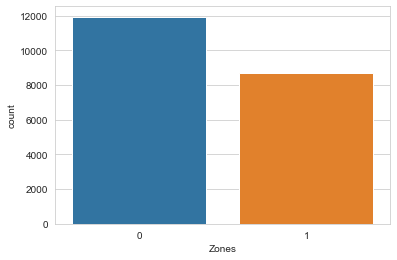

In [17]:
sns.countplot(df['Zones'])

In [18]:
# new_df = pd.concat([new_df,pd.get_dummies(new_df['Zones'])],axis=1).drop('Zones',axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df['ocean_proximity'])],axis=1).drop('ocean_proximity',axis=1)

In [19]:
new_df = new_df.rename({0:'Zone A',1:'Zone B',2:'Zone C'},axis=1)

In [20]:

new_df.rename({'<1H OCEAN':'Near Ocean'},inplace=True,axis=1)
new_df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Zones,Near Ocean,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,0,0,0,1,0


In [21]:
x = new_df.drop('median_house_value',axis=1)
y = pd.DataFrame(new_df['median_house_value'],columns=['median_house_value'])

In [22]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 41)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

In [24]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [26]:
# Creating instance of Linear Regresssion
LReg = LR()
# Fitting the model
LReg.fit(train_x, train_y)

LinearRegression()

In [27]:
train_predict = LReg.predict(train_x)
k = np.sqrt(mean_squared_error(train_y,train_predict))
r2 = r2_score(train_y,train_predict)
m = mean_absolute_error(train_y,train_predict)
print('Training Mean Squared Error', k )
print('Training R2 Score', r2 )
print('Training Mean Absolue Error', m )

Training Mean Squared Error 69869.55731675353
Training R2 Score 0.6339454608649582
Training Mean Absolue Error 50614.421072794124


In [28]:
test_predict = LReg.predict(test_x)
k = np.sqrt(mean_squared_error(test_y,test_predict))
r2 = r2_score(test_y,test_predict)
m = mean_absolute_error(test_y,test_predict)
print('Testing Mean Squared Error', k )
print('Testing R2 Score', r2 )
print('Testing Mean Absolue Error', m )

Testing Mean Squared Error 69462.63631739301
Testing R2 Score 0.635805870914946
Testing Mean Absolue Error 50258.54843254139


In [29]:
test_predict = pd.DataFrame(test_predict,columns=['Predicted Values'])
residuals = pd.DataFrame({'Fitted Values' : test_y['median_house_value'].to_numpy(), 'Predicted Values' : test_predict['Predicted Values']})
residuals['residuals'] = residuals['Fitted Values'] - residuals['Predicted Values']
residuals.head(20)

,Fitted Values,Predicted Values,residuals
0,119400.0,93544.103681,25855.896319
1,167000.0,263256.103681,-96256.103681
2,159300.0,173224.103681,-13924.103681
3,202800.0,292504.103681,-89704.103681
4,70300.0,72312.103681,-2012.103681
5,119100.0,192072.103681,-72972.103681
6,181800.0,119816.103681,61983.896319
7,161800.0,165288.103681,-3488.103681
8,89800.0,138408.103681,-48608.103681
9,221800.0,281736.103681,-59936.103681


In [30]:
from sklearn.ensemble import RandomForestRegressor as RF

In [31]:

RFReg = RF(criterion='mse',max_depth=15)
# Fitting the model
RFReg.fit(train_x, train_y)

<ipython-input-31-b66974de2b82>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFReg.fit(train_x, train_y)


RandomForestRegressor(max_depth=15)

In [32]:
train_predict = RFReg.predict(train_x)
k = np.sqrt(mean_squared_error(train_y,train_predict))
r2 = r2_score(train_y,train_predict)
m = mean_absolute_error(train_y,train_predict)
print('Training Mean Squared Error', k )
print('Training R2 Score', r2 )
print('Training Mean Absolue Error', m )

Training Mean Squared Error 31187.429670557933
Training R2 Score 0.9270661767060775
Training Mean Absolue Error 23259.339493326555


In [33]:
test_predict = RFReg.predict(test_x)
k = np.sqrt(mean_squared_error(test_y,test_predict))
r2 = r2_score(test_y,test_predict)
m = mean_absolute_error(test_y,test_predict)
print('Testing Mean Squared Error', k )
print('Testing R2 Score', r2 )
print('Testing Mean Absolue Error', m )

Testing Mean Squared Error 59472.229728782695
Testing R2 Score 0.7330322144604282
Testing Mean Absolue Error 41481.186120129794


In [34]:
test_predict = pd.DataFrame(test_predict,columns=['Predicted Values'])
residuals = pd.DataFrame({'Fitted Values' : test_y['median_house_value'].to_numpy(), 'Predicted Values' : test_predict['Predicted Values']})
residuals['residuals'] = residuals['Fitted Values'] - residuals['Predicted Values']
residuals.head(20)

,Fitted Values,Predicted Values,residuals
0,119400.0,78895.018008,40504.981992
1,167000.0,343474.764306,-176474.764306
2,159300.0,150955.988406,8344.011594
3,202800.0,247903.150178,-45103.150178
4,70300.0,79697.808974,-9397.808974
5,119100.0,164404.516862,-45304.516862
6,181800.0,123844.495942,57955.504058
7,161800.0,138127.246751,23672.753249
8,89800.0,127399.634299,-37599.634299
9,221800.0,222673.862151,-873.862151


In [35]:
import xgboost

In [36]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [37]:
from collections import OrderedDict 
every_column_except_y= [col for col in new_df.columns if col not in ['median_house_value','Zones']]

model.fit(new_df[every_column_except_y],new_df['median_house_value'])

OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))


OrderedDict([('median_income', 12802),
             ('total_rooms', 11598),
             ('population', 11445),
             ('total_bedrooms', 10195),
             ('households', 10180),
             ('housing_median_age', 6601),
             ('NEAR OCEAN', 1109),
             ('INLAND', 1097),
             ('Near Ocean', 1053),
             ('NEAR BAY', 1029),
             ('ISLAND', 403)])

In [38]:
#Let's remove the less important ones 
most_relevant_features= list( dict((k, v) for k, v in model.get_booster().get_fscore().items() if v >= 10).keys())
print(most_relevant_features)

['INLAND', 'households', 'NEAR BAY', 'total_rooms', 'population', 'housing_median_age', 'median_income', 'Near Ocean', 'NEAR OCEAN', 'total_bedrooms', 'ISLAND']


In [ ]:
from sklearn.model_selection import GridSearchCV
train_x=new_df[most_relevant_features]
train_y=new_df['median_house_value']

# for tuning parameters
parameters_for_testing = {
   'colsample_bytree':[0.4,0.6,0.8],
   'gamma':[0,0.03,0.1,0.3],
   'min_child_weight':[1.5,6,10],
   'learning_rate':[0.1,0.07],
   'max_depth':[3,5],
   'n_estimators':[10000],
   'reg_alpha':[1e-5, 1e-2,  0.75],
   'reg_lambda':[1e-5, 1e-2, 0.45],
   'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(train_x,train_y)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 10.0min


In [535]:
test_predict = xg_reg.predict(test_x)
k = np.sqrt(mean_squared_error(test_y,test_predict))
r2 = r2_score(test_y,test_predict)
m = mean_absolute_error(test_y,test_predict)
print('Testing Mean Squared Error', k )
print('Testing R2 Score', r2 )
print('Testing Mean Absolue Error', m )

Testing Mean Squared Error 117740.34066993759
Testing R2 Score -0.046359670753953974
Testing Mean Absolue Error 82143.10200308866


In [550]:
new_df[every_column_except_y]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0
